# Redes Neurais Recorrentes (RNN)

In [1]:
# Adaptação para utilizar a sintaxe do TensorFlor 1.x no TensorFlow 2.x
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

<br/> 
## Série Temporal com Redes Neurais Recorrentes (RNN)

In [3]:
base = pd.read_csv('petr4.csv')
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [4]:
base.dropna(inplace=True)

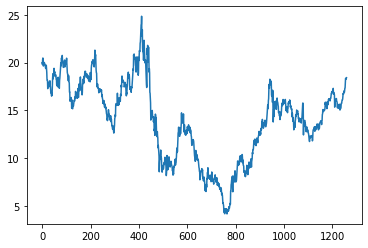

In [5]:
x = base.iloc[:, 1].values
plt.plot(x)

In [6]:
n_dias = 30

In [7]:
# Divisão dos dados de treino e teste
x_train = x[0:-(n_dias-1)]
x_test = x[-(n_dias+1):]
y_train = x[1:-(n_dias-1)+1]
y_test = x[-n_dias:]

In [8]:
# Reshape dos dados
x_batches = x_train.reshape(-1, n_dias, 1)
y_batches = y_train.reshape(-1, n_dias, 1) # shape=(41, 30, 1)

x_test = x_test[:n_dias].reshape(-1, n_dias, 1)
y_test = y_test.reshape(-1, n_dias, 1) # shape=(1, 30, 1)

In [9]:
tf.reset_default_graph()

In [10]:
input_neurons = 1
hidden_neurons = 100
output_neurons = 1

In [11]:
x_ph = tf.placeholder(tf.float32, shape=(None, n_dias, input_neurons))
y_ph = tf.placeholder(tf.float32, shape=(None, n_dias, output_neurons))

### a) RNN Básica

In [ ]:
cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_neurons, activation=tf.nn.relu)

### b) Técnica LSTM

In [ ]:
cell = tf.contrib.rnn.LSTMCell(num_units=hidden_neurons, activation=tf.nn.relu)

### c) Múltiplas Camadas

In [ ]:
# Cria uma celula
cell = tf.contrib.rnn.LSTMCell(num_units=hidden_neurons, activation=tf.nn.relu)

In [ ]:
# Cria varias celulas
cells = tf.nn.rnn_cell.MultiRNNCell([cell for i in range(4)])

In [ ]:
# Adiciona camada de dropout
cells = tf.contrib.rnn.DropoutWrapper(cells, output_keep_prob=0.1)

<br/><br/> 

In [ ]:
cell = tf.contrib.rnn.OutputProjectionWrapper(cell, output_size=1) # mapeamento para camada de saída

output_rnn, _ = tf.nn.dynamic_rnn(cell, x_ph, dtype=tf.float32)

erro = tf.losses.mean_squared_error(labels=y_ph, predictions=output_rnn)
otimizador = tf.train.AdamOptimizer(learning_rate=0.001)
treinamento = otimizador.minimize(erro)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(1000):
        _, loss = sess.run([treinamento, erro], feed_dict = {x_ph: x_batches, y_ph: y_batches})
        
        if epoch % 100 == 0:
            print('Epoch {}: erro: {}'.format(epoch+1, loss))
    
    previsoes = sess.run(output_rnn, feed_dict = {x_ph: x_test})

In [ ]:
# Avaliação do Resultado

# Redução de dimensão
y_test_1d = np.ravel(y_test)
previsoes_1d = np.ravel(previsoes)

mae = mean_absolute_error(y_test_1d, previsoes_1d)
mae

In [ ]:
# Visualização Gráfica
plt.plot(y_test_1d, label = 'Valor real')
plt.plot(previsoes_1d, label = 'Previsões')
plt.legend()